In [23]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [79]:
def curves_comparisson(curves_list, experiment_names):
    """
    Muestra dos subplots: uno con curvas de entrenamiento y otro con curvas de validación.

    Args:
        curves_list (list of dict): Cada dict debe tener 'train_loss' y 'val_loss'.
        experiment_names (list of str): Nombres de los experimentos, uno por cada curva.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    for curves, name in zip(curves_list, experiment_names):
        epochs = np.arange(len(curves["train_loss"])) + 1
        ax1.plot(epochs, curves['train_loss'], label=name)
        ax2.plot(epochs, curves['val_loss'], label=name)

    ax1.set_title("Training Loss")
    ax2.set_title("Validation Loss")

    for ax in [ax1, ax2]:
        ax.set_xlabel("Epoch")
        ax.set_ylabel("Loss")
        ax.legend()

    plt.tight_layout()
    plt.show()

In [13]:
curvas_delight = np.load("resultados\delight\curvas.npy", allow_pickle=True).item()
curvas_delight_classic = np.load("resultados\delight_classic\curvas.npy", allow_pickle=True).item()

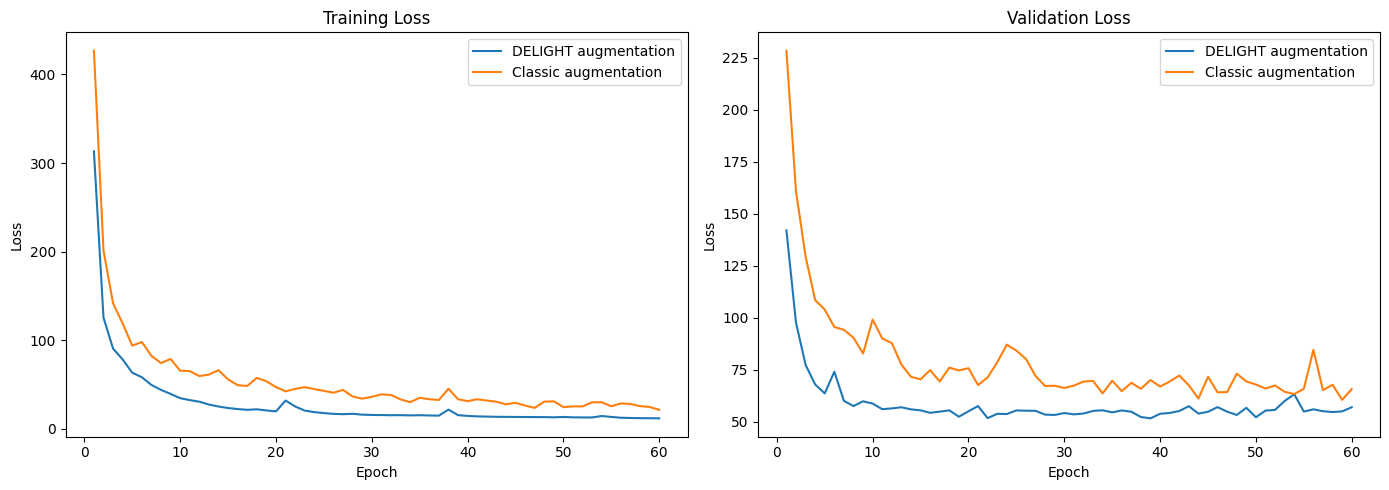

In [81]:
curves_comparisson(
    [curvas_delight, curvas_delight_classic],
    ["DELIGHT augmentation", "Classic augmentation"]
)

In [67]:
preds_delight = torch.tensor(np.load("resultados\delight/test_predictions.npy"))
preds_delight_classic = torch.tensor(np.load("resultados\delight_classic/test_predictions.npy"))

y_test = np.load("data\y_test.npy")[::-1]
y_test = torch.tensor(y_test.copy())

In [68]:
mse = torch.nn.MSELoss()

In [72]:
mse_delight = mse(preds_delight[:,0,:], y_test)
mse_delight_classic = mse(preds_delight_classic, y_test)

In [73]:
mse_delight

tensor(1583.0356, dtype=torch.float64)

In [74]:
mse_delight_classic

tensor(1586.3861, dtype=torch.float64)